<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/DecisionTree_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [8]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

### **데이터 구성하기**

In [3]:
df_raw = pd.read_csv('/content/mydrive/MyDrive/Concrete.csv')

print(df_raw.shape)
df_raw.head()

(1030, 9)


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              1030 non-null   float64
 1   blast_furnace_slag  1030 non-null   float64
 2   fly_ash             1030 non-null   float64
 3   water               1030 non-null   float64
 4   superplasticizer    1030 non-null   float64
 5   coarse_aggregate    1030 non-null   float64
 6   fine_aggregate      1030 non-null   float64
 7   age                 1030 non-null   int64  
 8   strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df_raw_x = df_raw.drop('strength',axis = 1)
df_raw_y = df_raw['strength']

In [6]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, 
                                                                df_raw_y, 
                                                                test_size = 0.4, 
                                                                random_state = 1234)

print('df_train_x size : {}'.format(df_train_x.shape))
print('df_test_x size : {}'.format(df_test_x.shape))
print('df_train_y size : {}'.format(df_train_y.shape))
print('df_test_y size : {}'.format(df_test_y.shape))

df_train_x size : (618, 8)
df_test_x size : (412, 8)
df_train_y size : (618,)
df_test_y size : (412,)


### **모델 생성하기**

In [9]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.996
Score on test set : 0.790


만들어진 의사결정나무 모델은 train과 test 데이터에 대해 각각 99.6%, 79%의 설명력을 갖는다. train 데이터에 있어서 과대적합되는 현상이 일어난 것으로 보인다.

### **모델 파라미터 설정하기 : min_samples_leaf**

In [10]:
train_score = []; test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples in para_leaf :
    tree = DecisionTreeRegressor(random_state = 1234,
                                 min_samples_leaf = v_min_samples)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [11]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.996,0.790
1,2,0.978,0.783
2,3,0.959,0.786
3,4,0.943,0.796
4,5,0.934,0.811
5,6,0.920,0.810
6,7,0.909,0.799
7,8,0.900,0.792
8,9,0.877,0.817
9,10,0.868,0.816


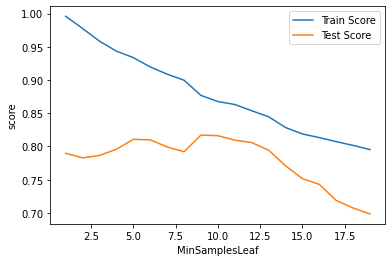

In [12]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('MinSamplesLeaf')
plt.legend()

- 리프 노드의 최소 샘플 수가 증가할수록 모델의 성능이 감소한다.
- 특히, test 데이터에 대한 모델의 성능은 10 이후로 감소하는 것으로 보인다.
- TestScore가 0.817이고 TrainScore가 0.877인 **min_samples_leaf = 9**를 파라미터로 설정한다. 

### **모델 파라미터 설정하기 : min_samples_split**

In [13]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_samples_split in para_split :
    tree = DecisionTreeRegressor(random_state = 1234,
                                 min_samples_leaf = 9,
                                 min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [14]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.877,0.817
1,6,0.877,0.817
2,8,0.877,0.817
3,10,0.877,0.817
4,12,0.877,0.817
5,14,0.877,0.817
6,16,0.877,0.817
7,18,0.877,0.817
8,20,0.874,0.817
9,22,0.870,0.809


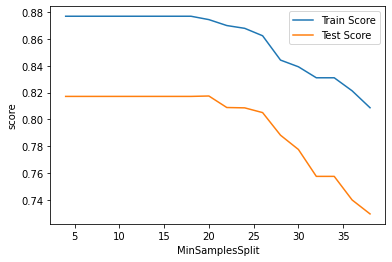

In [15]:
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('MinSamplesSplit')
plt.legend()

- 리프 노드의 최소 샘플 수가 증가할수록 모델의 성능에 변화가 없다.
- minsamplessplit = 20인 지점에서부터 감소한다.
- 특히, test 데이터에 대한 모델의 성능은 10 이후로 감소하는 것으로 보인다.
- TestScore가 0.817이고 TrainScore가 0.877인 **min_samples_leaf = 9**를 파라미터로 설정한다. 